In [1]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import pickle
from imblearn.combine import SMOTEENN
from sklearn.metrics import roc_auc_score

In [2]:
uploaded = files.upload()

Saving Data_Pathrise.xlsx to Data_Pathrise.xlsx


In [3]:
df = pd.read_excel('Data_Pathrise.xlsx')

In [4]:
df.columns

Index(['id', 'pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'employment_status ',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race'],
      dtype='object')

## Removing the space after columns names ##

In [5]:
df.columns = df.columns.str.rstrip()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

In [ ]:
df['pathrise_status']

0                   Active
1                   Active
2              Closed Lost
3              Closed Lost
4                   Placed
               ...        
2539    Withdrawn (Failed)
2540    Withdrawn (Failed)
2541                Active
2542                Active
2543             Withdrawn
Name: pathrise_status, Length: 2544, dtype: object

In [7]:
df = df[df['pathrise_status'].isin (['Placed','Withdrawn (Failed)'])]

In [8]:
df.drop(columns=['gender','race','cohort_tag','pathrise_status','id'],inplace=True)

In [11]:
df.columns

Index(['track', 'days', 'placed', 'employment_status', 'education',
       'job_search', 'challenge', 'experience', 'visa', 'interviews',
       'applications'],
      dtype='object')

## Renaming columns title ##

In [10]:
df = df.rename(columns={'primary_track':'track','program_duration_days':'days','highest_level_of_education':'education','length_of_job_search':'job_search','biggest_challenge_in_search':'challenge','professional_experience':'experience','work_authorization_status':'visa','number_of_interviews':'interviews','number_of_applications':'applications'})

In [12]:
df = df[df['days'].between(left=14,right=365)]

In [13]:
df.isnull().sum()

track                  0
days                   0
placed                 0
employment_status     98
education             14
job_search            36
challenge             15
experience            55
visa                 128
interviews            77
applications           0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 4 to 2534
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track              943 non-null    object 
 1   days               943 non-null    float64
 2   placed             943 non-null    int64  
 3   employment_status  845 non-null    object 
 4   education          929 non-null    object 
 5   job_search         907 non-null    object 
 6   challenge          928 non-null    object 
 7   experience         888 non-null    object 
 8   visa               815 non-null    object 
 9   interviews         866 non-null    float64
 10  applications       943 non-null    int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 88.4+ KB


## Filling Missing Values ##

In [15]:
df['interviews'] = df['interviews'].fillna(df['interviews'].mean())
df['visa'] = df['visa'].fillna(df['visa'].mode()[0])
df['experience'] = df['experience'].fillna(df['experience'].mode()[0])
df['challenge'] = df['challenge'].fillna(df['challenge'].mode()[0])
df['job_search'] = df['job_search'].fillna(df['job_search'].mode()[0])
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['employment_status'] = df['employment_status'].fillna(df['employment_status'].mode()[0])


In [16]:
df['applications'] = df['applications'].astype(int)
df['interviews'] = df['interviews'].astype(int)
df['days'] = df['days'].astype(int)


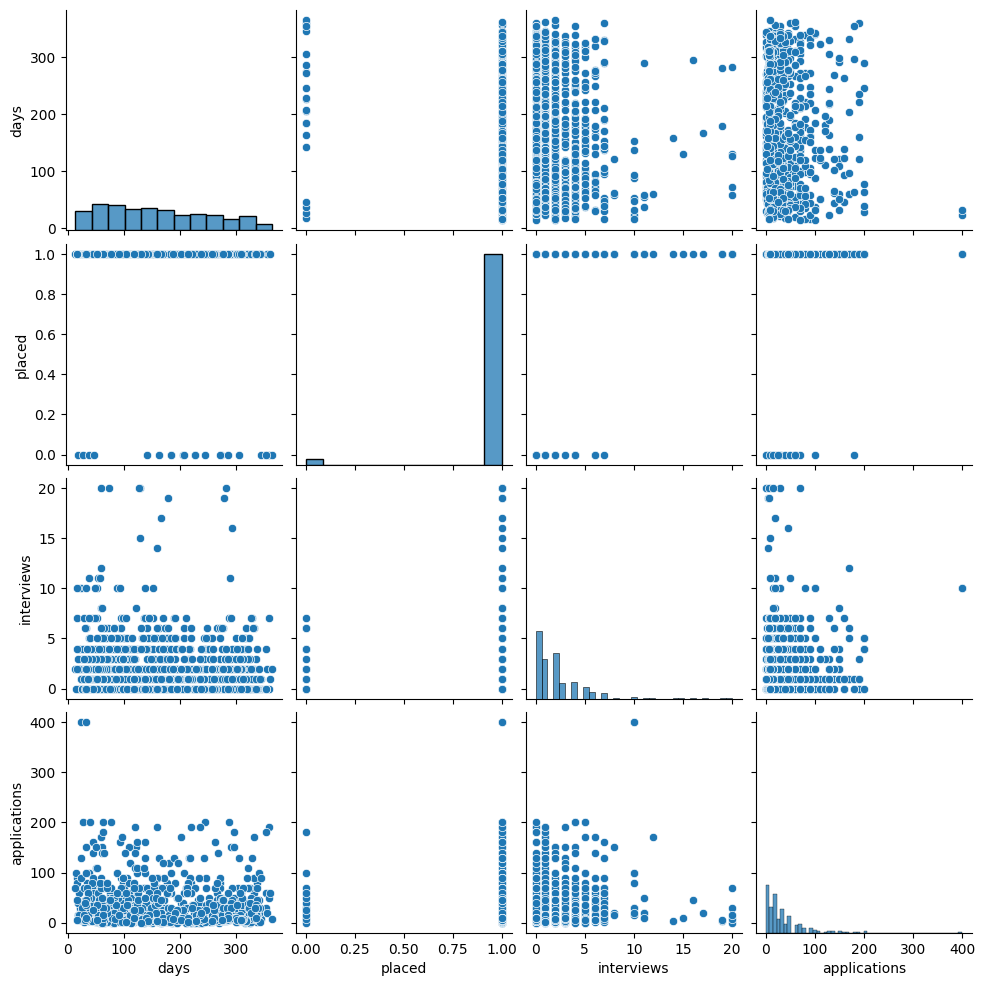

In [ ]:
sns.pairplot(df)

In [17]:
def cleaner(x):
 x = x.replace('High School Graduate','High School')
 x = x.replace('Some High School','High School')
 x = x.replace('GED or equivalent','High School')
 x = x.replace("Bachelor's Degree",'Bachelor')
 x = x.replace("Master's Degree",'Master')
 x = x.replace("Doctorate or Professional Degree","PHD")
 x = x.replace("Some College, No Degree",'College')
 x = x.replace('Less than one month',"0-1 month")
 x = x.replace("6 months to a year","6-12 months")
 return(x)


In [18]:
df['job_search'] = df['job_search'].apply(cleaner)
df['education'] = df['education'].apply(cleaner)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 4 to 2534
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   track              943 non-null    object
 1   days               943 non-null    int64 
 2   placed             943 non-null    int64 
 3   employment_status  943 non-null    object
 4   education          943 non-null    object
 5   job_search         943 non-null    object
 6   challenge          943 non-null    object
 7   experience         943 non-null    object
 8   visa               943 non-null    object
 9   interviews         943 non-null    int64 
 10  applications       943 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 88.4+ KB


(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(-50.0, 0, '−50'),
  Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350'),
  Text(400.0, 0, '400')])

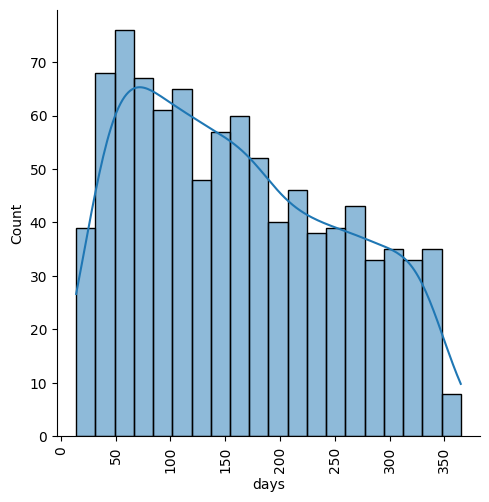

In [ ]:
sns.displot(data=df,x='days',bins=20,kde=True)
plt.xticks(rotation=90)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(-50.0, 0, '−50'),
  Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350'),
  Text(400.0, 0, '400')])

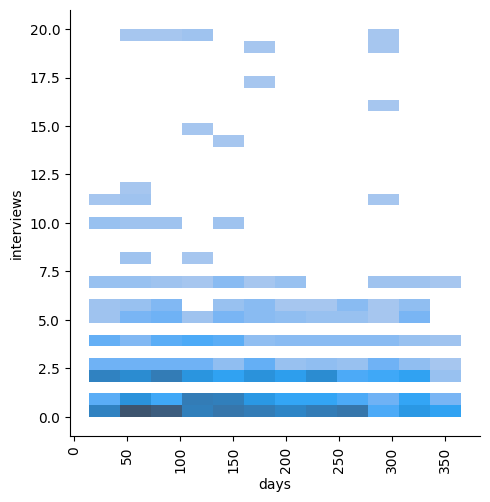

In [ ]:
sns.displot(data=df,x='days', y='interviews')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Employed Part-Time'),
  Text(2, 0, 'Student'),
  Text(3, 0, 'Employed Full-Time'),
  Text(4, 0, 'Contractor')])

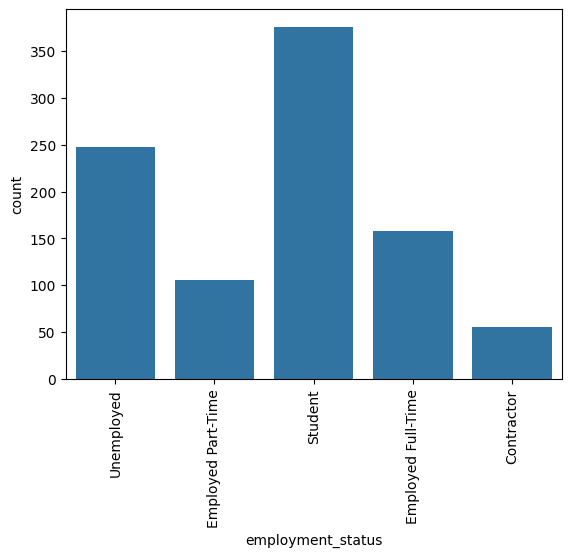

In [ ]:
sns.countplot(data=df,x='employment_status')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Test')

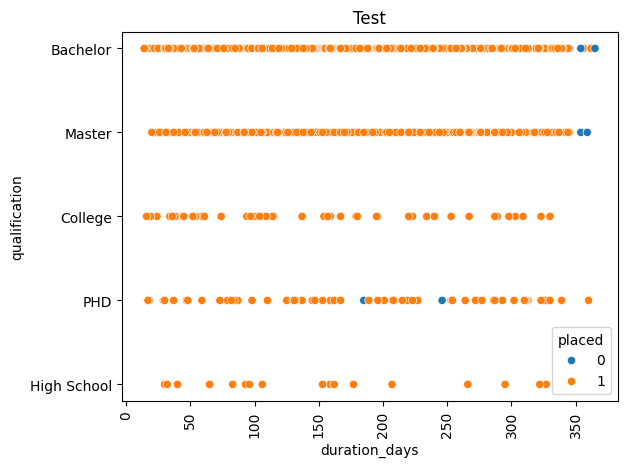

In [ ]:
sns.scatterplot(data=df,x='days',y='education',hue='placed')
plt.xticks(rotation=90)
plt.xlabel('duration_days')
plt.ylabel('qualification')
plt.title('Test')

<Axes: xlabel='days', ylabel='education'>

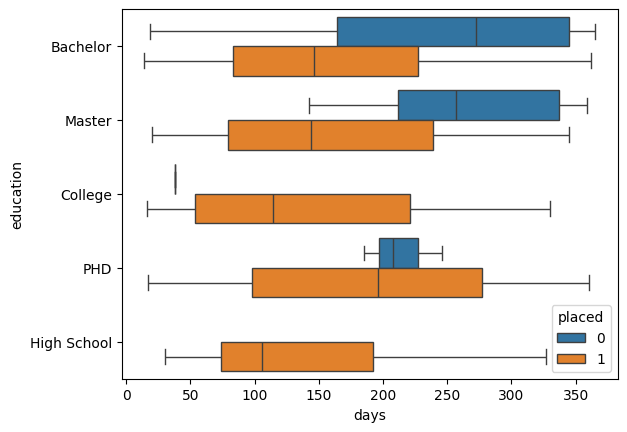

In [ ]:
sns.boxplot(data=df,x='days',y='education',hue='placed')

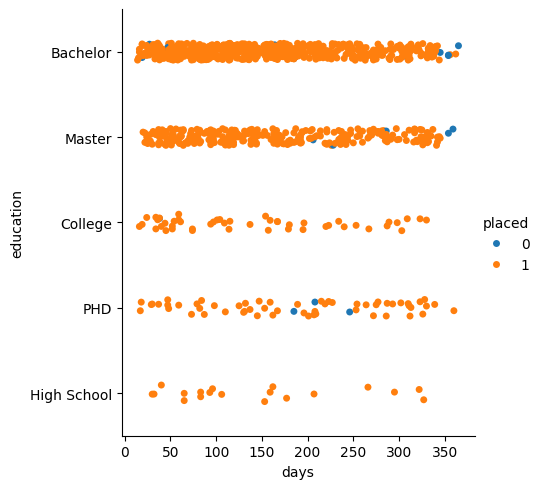

In [ ]:
sns.catplot(data=df,x='days',y='education',hue='placed')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 4 to 2534
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   track              943 non-null    object
 1   days               943 non-null    int64 
 2   placed             943 non-null    int64 
 3   employment_status  943 non-null    object
 4   education          943 non-null    object
 5   job_search         943 non-null    object
 6   challenge          943 non-null    object
 7   experience         943 non-null    object
 8   visa               943 non-null    object
 9   interviews         943 non-null    int64 
 10  applications       943 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 88.4+ KB


In [20]:
x = df.drop(columns=['track','days','placed','job_search','challenge','employment_status'])

In [21]:
y_d = df['days']

In [22]:
y_p = df['placed']

In [23]:
x = pd.get_dummies(x,columns=['visa','experience','education'])

In [24]:
cols = x.columns

In [25]:
cols

Index(['interviews', 'applications', 'visa_Canada Citizen', 'visa_Citizen',
       'visa_F1 Visa/CPT', 'visa_F1 Visa/OPT', 'visa_Green Card', 'visa_H1B',
       'visa_Other', 'visa_STEM OPT', 'experience_1-2 years',
       'experience_3-4 years', 'experience_5+ years',
       'experience_Less than one year', 'education_Bachelor',
       'education_College', 'education_High School', 'education_Master',
       'education_PHD'],
      dtype='object')

## In order to use Regression we need to standardize the data ##

In [26]:
scaler = StandardScaler()

In [27]:

x_scaled = scaler.fit_transform(x)

In [28]:
x = pd.DataFrame(x_scaled,columns=cols)

In [29]:
x

,interviews,applications,visa_Canada Citizen,visa_Citizen,visa_F1 Visa/CPT,visa_F1 Visa/OPT,visa_Green Card,visa_H1B,visa_Other,visa_STEM OPT,experience_1-2 years,experience_3-4 years,experience_5+ years,experience_Less than one year,education_Bachelor,education_College,education_High School,education_Master,education_PHD
0,2.826252,1.549914,-0.098163,-1.147586,-0.223856,1.760682,-0.272088,-0.113531,-0.221231,-0.046102,1.219888,-0.554892,-0.352075,-0.581024,0.882749,-0.234115,-0.143397,-0.658127,-0.260673
1,0.663562,-0.476764,-0.098163,0.871394,-0.223856,-0.567962,-0.272088,-0.113531,-0.221231,-0.046102,1.219888,-0.554892,-0.352075,-0.581024,0.882749,-0.234115,-0.143397,-0.658127,-0.260673
2,1.024010,-0.739040,-0.098163,0.871394,-0.223856,-0.567962,-0.272088,-0.113531,-0.221231,-0.046102,1.219888,-0.554892,-0.352075,-0.581024,-1.132825,-0.234115,-0.143397,1.519464,-0.260673
3,-0.778232,-0.810570,-0.098163,-1.147586,4.467164,-0.567962,-0.272088,-0.113531,-0.221231,-0.046102,1.219888,-0.554892,-0.352075,-0.581024,-1.132825,-0.234115,-0.143397,1.519464,-0.260673
4,-0.057335,-0.476764,-0.098163,-1.147586,-0.223856,1.760682,-0.272088,-0.113531,-0.221231,-0.046102,-0.819747,-0.554892,2.840301,-0.581024,-1.132825,-0.234115,-0.143397,1.519464,-0.260673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,1.384458,-0.691354,-0.098163,0.871394,-0.223856,-0.567962,-0.272088,-0.113531,-0.221231,-0.046102,-0.819747,-0.554892,-0.352075,1.721100,0.882749,-0.234115,-0.143397,-0.658127,-0.260673
939,-0.057335,0.238534,-0.098163,-1.147586,-0.223856,-0.567962,-0.272088,-0.113531,4.520157,-0.046102,-0.819747,-0.554892,2.840301,-0.581024,-1.132825,-0.234115,-0.143397,-0.658127,3.836231
940,-0.778232,-0.691354,-0.098163,-1.147586,-0.223856,1.760682,-0.272088,-0.113531,-0.221231,-0.046102,1.219888,-0.554892,-0.352075,-0.581024,-1.132825,-0.234115,-0.143397,-0.658127,3.836231
941,-0.778232,-0.619824,-0.098163,-1.147586,-0.223856,1.760682,-0.272088,-0.113531,-0.221231,-0.046102,-0.819747,1.802151,-0.352075,-0.581024,0.882749,-0.234115,-0.143397,-0.658127,-0.260673


## Using Linear Regression to predict the numbers of days for the program placement ##  

In [30]:
x_train,x_test,y_d_train,y_d_test = train_test_split(x,y_d,test_size=0.2,random_state=101)


In [31]:
lr = LinearRegression()

In [32]:
lr.fit(x_train,y_d_train)

LinearRegression()

In [ ]:
lr.intercept_
lr.coef_

array([ 2.24350464e-02,  6.41595521e-01, -1.29267704e+01,  2.70311000e+01,
       -4.16255536e+01, -1.51231139e+01,  4.20027425e+01, -5.39216595e-02,
       -4.04267653e+00,  5.18247922e+00, -3.27831258e+00,  2.19243155e+00,
        8.45311304e+00, -2.32546140e+01, -2.04592847e+01,  8.03905415e+00,
        2.72217315e+01, -1.13669748e+00,  1.01869711e+00, -1.08542556e+01,
       -5.32010007e+00,  1.62923560e+01, -9.05561902e+00,  1.98247182e+01,
        2.27482617e+01,  1.42931220e+00, -1.10387800e+01, -1.23777105e+01,
       -2.76854298e+01, -2.23151239e+01,  1.24793615e+01,  2.59910096e+01,
        1.21187551e+01, -1.80907713e+00, -9.32330321e+00, -9.86374766e-01,
        2.26458929e+01, -1.42502179e+01, -6.43656295e+00, -1.23862456e+01,
        1.34467713e+00, -3.49841405e+01, -4.71925619e+01,  9.12591589e+01,
        1.31409832e+01,  2.23416109e+01,  1.02448451e+01, -1.11378081e+01,
       -3.07479026e+00,  2.04676410e+01,  1.17881446e+01,  3.19571324e+00,
       -7.43878881e+01, -

In [33]:
prediction = lr.predict(x_test)

In [34]:
residual = prediction - y_d_test

<ipython-input-35-9b74ba467209>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual,bins=30)


<Axes: xlabel='days', ylabel='Density'>

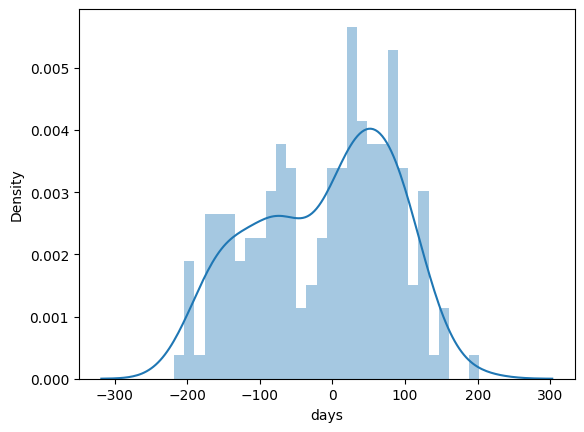

In [35]:
sns.distplot(residual,bins=30)

In [36]:
print("MAE:",mean_absolute_error(y_d_test,prediction))

MAE: 81.1160818173884


In [ ]:
df

,track,days,placed,employment_status,education,job_search,challenge,experience,visa,interviews,applications
4,SWE,89,1,Unemployed,Bachelor,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10,100
7,SWE,19,0,Employed Part-Time,Bachelor,0-1 month,Getting past final round interviews,1-2 years,Citizen,4,15
23,PSO,193,1,Unemployed,Master,6-12 months,Hearing back on my applications,1-2 years,Citizen,5,4
30,SWE,73,1,Student,Master,0-1 month,Figuring out which jobs to apply for,1-2 years,F1 Visa/CPT,0,1
39,SWE,83,1,Employed Full-Time,Master,3-5 months,Getting past final round interviews,5+ years,F1 Visa/OPT,2,15
...,...,...,...,...,...,...,...,...,...,...,...
2527,SWE,31,1,Student,Bachelor,1-2 months,Figuring out which jobs to apply for,Less than one year,Citizen,6,6
2528,Design,277,1,Student,PHD,0-1 month,Technical interviewing,5+ years,Other,2,45
2531,SWE,310,1,Unemployed,PHD,0-1 month,Technical skills,1-2 years,F1 Visa/OPT,0,6
2533,Design,33,1,Student,Bachelor,1-2 months,Hearing back on my applications,3-4 years,F1 Visa/OPT,0,9


In [ ]:
pickle.dump(lr,open('placement_days_estimator.pkl','wb'))

## Resampling the data to fix the imbalancement in placed target column ##

In [37]:
y_p.value_counts()

1    920
0     23
Name: placed, dtype: int64

In [39]:
comb_sampler = SMOTEENN(random_state=42)
x_sampler,y_p_sampler = comb_sampler.fit_resample(x,y_p)


In [42]:
y_p_sampler.value_counts()

0    844
1    804
Name: placed, dtype: int64

## Using Logistic Regression to predict placement ##

In [43]:
x_p_train,x_p_test,y_p_train,y_p_test = train_test_split(x_sampler,y_p_sampler,test_size=0.5,random_state=101)


In [44]:
log_reg_pre = LogisticRegression()
parameters = {'C':[0.01,0.1,1],'penalty':['l2'],'solver':['lbfgs']}
log_reg_cv = GridSearchCV(log_reg_pre,parameters)
log_reg_cv.fit(x_p_train,y_p_train)
print('tuned hyperparameters:(best parammeters)',log_reg_cv.best_params_)
print('GridSearch accuracy:',log_reg_cv.best_score_)


tuned hyperparameters:(best parammeters) {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
GridSearch accuracy: 0.6990022172949002


In [45]:
log_reg = LogisticRegression(C=0.01,penalty='l2',solver='lbfgs')

In [46]:
log_reg.fit(x_p_train,y_p_train)

LogisticRegression(C=0.01)

In [47]:
prediction_placed = log_reg.predict(x_p_test)

In [48]:
confusion_matrix(y_p_test,prediction_placed)

array([[343,  78],
       [177, 226]])

## Showing the confusion matrix as heatmap plot ##

In [49]:
def plot_confusion_matrix(y,y_prediction):
  cm = confusion_matrix(y,y_prediction)
  ax = plt.subplot()
  sns.heatmap(cm,annot=True,fmt='.0f',ax=ax)
  ax.set_xlabel("Predicted labels")
  ax.set_ylabel("True Labels")
  ax.set_title("Confusion Matrix")
  ax.xaxis.set_ticklabels(["didn't land",'landed'])
  ax.yaxis.set_ticklabels(["didn't land",'landed'])


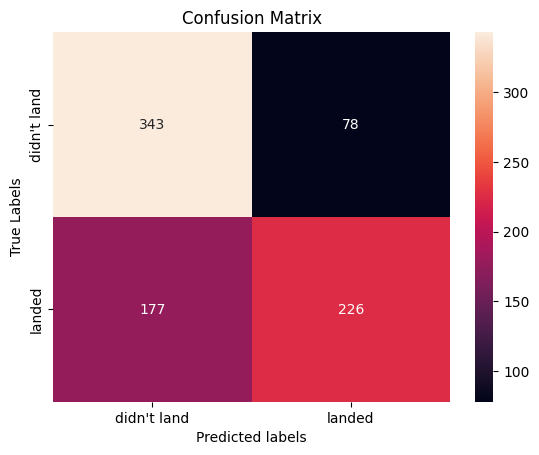

In [50]:
plot_confusion_matrix(y_p_test,prediction_placed)

In [51]:
print (classification_report(y_p_test,prediction_placed))

              precision    recall  f1-score   support

           0       0.66      0.81      0.73       421
           1       0.74      0.56      0.64       403

    accuracy                           0.69       824
   macro avg       0.70      0.69      0.68       824
weighted avg       0.70      0.69      0.69       824



In [52]:
print(accuracy_score(y_p_test,prediction_placed))

0.6905339805825242


In [53]:
acc = []
methods = []

In [54]:
acc.append(accuracy_score(y_p_test,prediction_placed))
methods.append("Logistic Regression")

## Using KNN Model ##

In [55]:
knn_pre = KNeighborsClassifier()

## Finding the best K through using GridSearch ##

In [56]:
parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
knn_cv = GridSearchCV(knn_pre,parameters)
knn_cv.fit(x_p_train,y_p_train)
print('tuned hyperparameter: (best parameters)',knn_cv.best_params_)

tuned hyperparameter: (best parameters) {'n_neighbors': 1}


In [57]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_p_train,y_p_train)

KNeighborsClassifier(n_neighbors=1)

In [58]:
prediction_knn = knn.predict(x_p_test)

In [59]:
confusion_matrix(y_p_test,prediction_knn)

array([[421,   0],
       [  5, 398]])

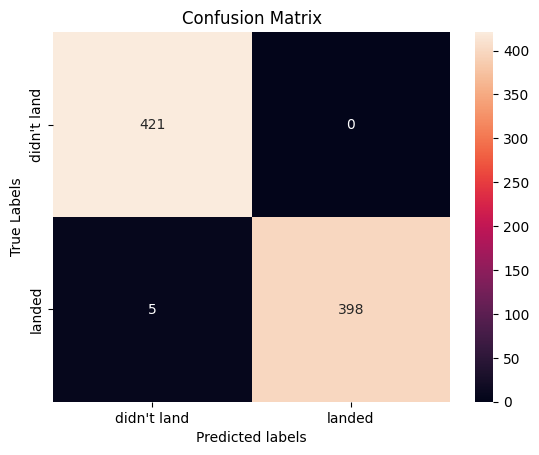

In [60]:
plot_confusion_matrix(y_p_test,prediction_knn)

In [61]:
print(classification_report(y_p_test,prediction_knn))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       421
           1       1.00      0.99      0.99       403

    accuracy                           0.99       824
   macro avg       0.99      0.99      0.99       824
weighted avg       0.99      0.99      0.99       824



In [62]:
accuracy_score(y_p_test,prediction_knn)

0.9939320388349514

In [63]:
acc.append(accuracy_score(y_p_test,prediction_knn))
methods.append("KNN")

## Using Decision Tree Model ##

In [64]:
tree_pre = DecisionTreeClassifier()

In [65]:
parameters = {'min_samples_leaf':[1,2,4],'min_samples_split':[2,5]}
tree_cv = GridSearchCV(tree_pre,parameters)
tree_cv.fit(x_p_train,y_p_train)
print('tuned hyperparameters: (best parameters)',tree_cv.best_params_)

tuned hyperparameters: (best parameters) {'min_samples_leaf': 1, 'min_samples_split': 2}


In [66]:
tree = DecisionTreeClassifier(min_samples_leaf=1, min_samples_split=2)
tree.fit(x_p_train,y_p_train)

DecisionTreeClassifier()

In [67]:
prediction_tree = tree.predict(x_p_test)

In [68]:
confusion_matrix(y_p_test,prediction_tree)

array([[402,  19],
       [ 15, 388]])

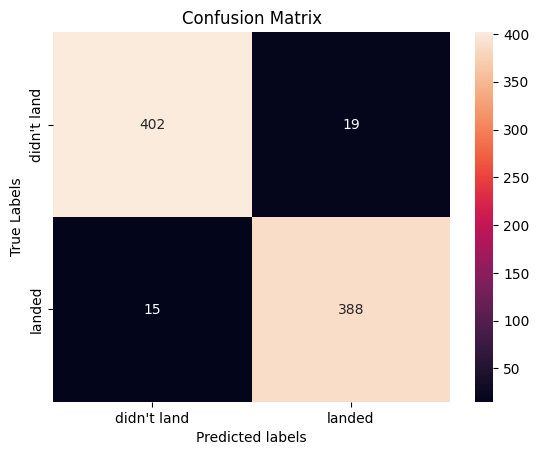

In [69]:
plot_confusion_matrix(y_p_test,prediction_tree)

In [70]:
print(classification_report(y_p_test,prediction_tree))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       421
           1       0.95      0.96      0.96       403

    accuracy                           0.96       824
   macro avg       0.96      0.96      0.96       824
weighted avg       0.96      0.96      0.96       824



In [71]:
accuracy_score(y_p_test,prediction_tree)

0.9587378640776699

In [72]:
acc.append(accuracy_score(y_p_test,prediction_tree))
methods.append("Decision Tree")

## Using Randm Forest Model ##

In [73]:
forest_pre = RandomForestClassifier()

In [74]:
parameters = {'min_samples_leaf':[1,2,4],'min_samples_split':[2,5,100],'n_estimators':[10,20,30,100]}
forest_cv = GridSearchCV(forest_pre,parameters)
forest_cv.fit(x_p_train,y_p_train)
print('tuned hyperparameters: (best parameters)',forest_cv.best_params_)

tuned hyperparameters: (best parameters) {'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [75]:
forest = RandomForestClassifier(min_samples_leaf=1,min_samples_split=5,n_estimators=100)
forest.fit(x_p_train,y_p_train)

RandomForestClassifier(min_samples_split=5)

In [76]:
prediction_forest = forest.predict(x_p_test)

In [77]:
confusion_matrix(y_p_test,prediction_forest)

array([[418,   3],
       [  3, 400]])

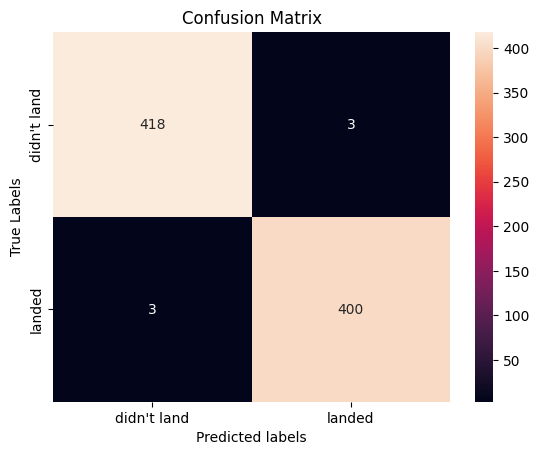

In [78]:
plot_confusion_matrix(y_p_test,prediction_forest)

In [79]:
print(classification_report(y_p_test,prediction_forest))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       421
           1       0.99      0.99      0.99       403

    accuracy                           0.99       824
   macro avg       0.99      0.99      0.99       824
weighted avg       0.99      0.99      0.99       824



In [80]:
accuracy_score(y_p_test,prediction_forest,normalize=True)

0.9927184466019418

In [81]:
acc.append(accuracy_score(y_p_test,prediction_forest))
methods.append("Random Forest")

## Using Support Vector Machine Model- SVM ##

In [82]:
svm_pre = SVC()

In [83]:
parameters = {'C':[0.5,1,1.5],'kernel':['linear','rbf','sigmoid']}
svm_cv = GridSearchCV(svm_pre,parameters)
svm_cv.fit(x_p_train,y_p_train)
print('tuned hyperparameters:(best parameters)',svm_cv.best_params_)

tuned hyperparameters:(best parameters) {'C': 1.5, 'kernel': 'rbf'}


In [84]:
svm = SVC(C=1.5,kernel='rbf')

In [85]:
svm.fit(x_p_train,y_p_train)

SVC(C=1.5)

In [86]:
prediction_svm = svm.predict(x_p_test)

In [87]:
confusion_matrix(y_p_test,prediction_svm)

array([[409,  12],
       [ 77, 326]])

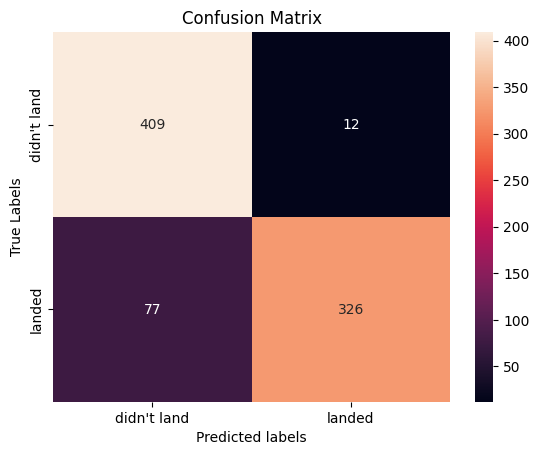

In [88]:
plot_confusion_matrix(y_p_test,prediction_svm)

In [89]:
print(classification_report(y_p_test,prediction_svm))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       421
           1       0.96      0.81      0.88       403

    accuracy                           0.89       824
   macro avg       0.90      0.89      0.89       824
weighted avg       0.90      0.89      0.89       824



In [90]:
accuracy_score(y_p_test,prediction_svm,normalize=True)

0.8919902912621359

In [91]:
acc.append(accuracy_score(y_p_test,prediction_svm,normalize=True))
methods.append('SVM')

<BarContainer object of 5 artists>

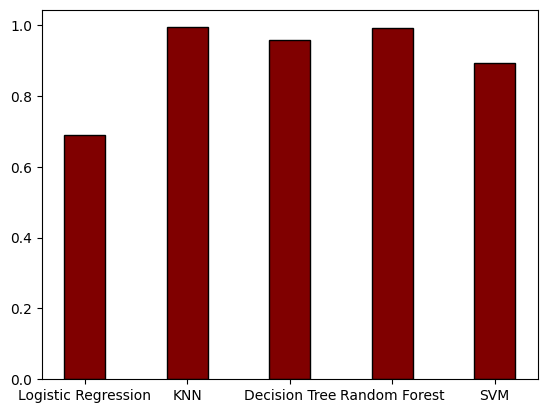

In [92]:
plt.bar(methods,acc,color='maroon',width=0.4,edgecolor='black')

In [93]:
print(methods)
print(acc)

['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM']
[0.6905339805825242, 0.9939320388349514, 0.9587378640776699, 0.9927184466019418, 0.8919902912621359]
